In [1]:
from triqs_tprf.tight_binding import TBLattice
import numpy as np
import matplotlib.pyplot as plt
from triqs_tprf.lattice_utils import k_space_path

Starting serial run at: 2024-12-16 16:57:56.194514


In [2]:
s1 = np.matrix([[0,1],[1,0]])
s2 = np.matrix([[0,-1j],[1j,0]])
s3 = np.matrix([[1,0],[0,-1]])
sup = np.matrix([[1,0],[0,0]])
sdo = np.matrix([[0,0],[0,1]])
s4 = np.matrix([[1,0],[0,1]])

paulis = [s1, s2, s3, s4]

In [3]:
def model(t1 : float, Bz : float, spin:int = 3):
    
    lattice = TBLattice(
    units = [(1.0, np.sqrt(3), 0.0), [1.0, 0.0, 0.0]],##### Primitive vectors of a honeycomb lattice
    orbital_positions = [(0.0, 0.0, 0), (0.0, 0.0, 0), (0.5, np.sqrt(3)/2, 0), (0.5, np.sqrt(3)/2, 0)],##### 2 sublattice x 2 spins
    orbital_names = ['1up', '1do', '2up', '2do'],
    hoppings = {
        # Intra-unit cell hopping
        ( 0, 0): (np.kron(np.matrix([[0, -t1], [-t1, 0]]), paulis[spin]) - 
            np.kron(np.matrix([[1, 0], [0, 1]]), (Bz * paulis[2])/2)),
        # Inter-unit cell hopping
        ( 0,-1): np.kron(np.matrix([[+t1,+t1], [  0,-t1]]), paulis[spin]),
        ( 0, 1): np.kron(np.matrix([[+t1,  0], [+t1,-t1]]), paulis[spin]),
        ( 1, 0): np.kron(np.matrix([[  0,  0], [-t1,  0]]), paulis[spin]),
        (-1, 0): np.kron(np.matrix([[  0,-t1], [  0,  0]]), paulis[spin]),
        ( 1,-1): np.kron(np.matrix([[  0,  0], [-t1,  0]]), paulis[spin]),
        (-1, 1): np.kron(np.matrix([[  0,-t1], [  0,  0]]), paulis[spin]),
        },
    )
    
    return lattice

In [4]:
def bands(lattice, N):
    
    kmesh = lattice.get_kmesh(n_k=(N, N, 1))
    e_k = lattice.fourier(kmesh)
    
    band = [np.linalg.eigvalsh(e_k(kmesh[i].value)) for i in range(N**2)]
    
    return band

In [5]:
t1 = 1.0
Bz = 0.0

dirac = model(t1, Bz)
N = 64
kmesh = dirac.get_kmesh(n_k=(N, N, 1))
e_k = dirac.fourier(kmesh)

In [13]:
G = [0.0, 0.0, 0.0]
M1 = [0.5, 0.0, 0.0]
M2 = [0.0, 0.5, 0.0]
M3 = [0.5, 0.5, 0.0]

paths = [(G, M1), (M1, M3), (M3, G)]

k_vecs, k_plot, k_ticks = k_space_path(paths, bz=dirac.bz)

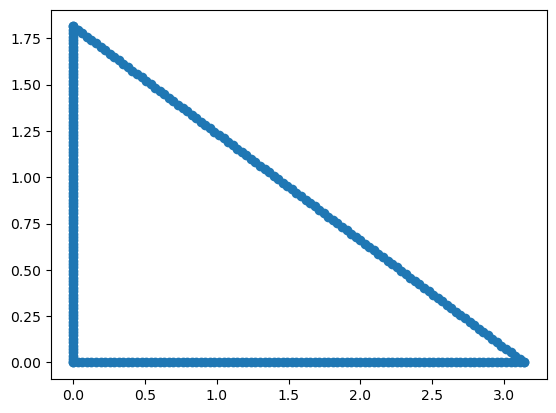

In [14]:
plt.scatter(k_vecs[:,0], k_vecs[:,1])
plt.show()

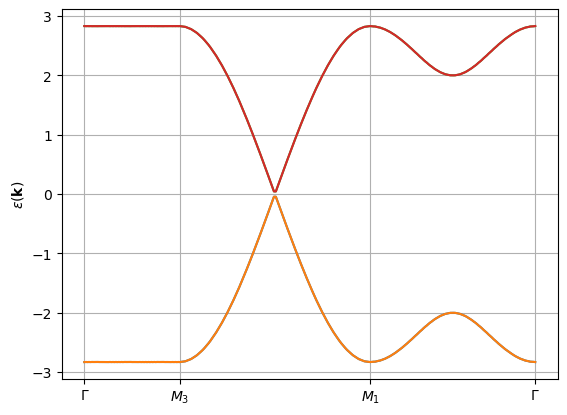

In [15]:
def energies(k, e_k):
    return np.linalg.eigvalsh(e_k(k))
##### Band structure
plt.plot(k_plot, [energies(k, e_k) for k in k_vecs])
plt.xticks(k_ticks, [r'$\Gamma$',r'$M_3$',r'$M_1$',r'$\Gamma$'])
plt.ylabel(r'$\epsilon(\mathbf{k})$')
plt.grid(True)